In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.plots as plots
from mafContrib import Plasticc_metric, plasticc_slicer
from lsst.sims.utils import _healbin
import healpy as hp

/Users/yoachim/git_repos/sims_maf_contrib/mafContrib/transientAsciiSEDMetric.py:19: UserWarning: sncosmo not installed
  warnings.warn('sncosmo not installed')
/Users/yoachim/git_repos/sims_maf_contrib/mafContrib/LSSObsStrategy/artificialStructureCalculation.py:40: UserWarning: sympy not installed
  warnings.warn('sympy not installed')


In [3]:
runName = 'baseline_v1.5_10yrs'
#runName = 'roll_mod3_sdf0.20mixed_10yrs'
#runName = 'very_alt3_rm5illum20_10yrs'
opsdb = db.OpsimDatabase(runName+'.db')
outDir = 'temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [4]:
bundleList = []
sql=''
slicer1 = plasticc_slicer(model='SNIa-normal', badval=0)
slicer2 = plasticc_slicer(model='KN', seed=43, badval=0)


In [5]:
metric = Plasticc_metric(metricName='SNIa')
# Set the maskval so that we count missing objects as zero.
summary_stats = [metrics.MeanMetric(maskVal=0)]
plotFuncs = [plots.HealpixSkyMap()]
bundle = metricBundles.MetricBundle(metric, slicer1, sql, runName=runName, summaryMetrics=summary_stats,
                                   plotFuncs=plotFuncs)
bundleList.append(bundle)

metric = Plasticc_metric(metricName='KN')
bundle = metricBundles.MetricBundle(metric, slicer2, sql, runName=runName, summaryMetrics=summary_stats,
                                   plotFuncs=plotFuncs)
bundleList.append(bundle)



In [6]:
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()

Querying database SummaryAllProps with no constraint for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter'].
Found 2224095 visits
Running:  ['baseline_v1_5_10yrs_SNIa_USER']


/Users/yoachim/git_repos/sims_maf_contrib/mafContrib/plasticcMetrics.py:110: RuntimeWarning: invalid value encountered in log10
  result[infilt] = -2.5*np.log10(result[infilt]) + zp


Completed metric generation.
Running:  ['baseline_v1_5_10yrs_KN_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Plotting figures with "" constraint now.


/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:518: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn('Cannot plot object metric values with this plotter.')
/Users/yoachim/lsst/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.1/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:569: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figformat" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(os.path.join(self.outDir, plotFile), figformat=self.figformat, dpi=self.dpi,
/Users/yoachim/lsst/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.1/

Plotting complete.


/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/metricBundles/metricBundleGroup.py:645: UserWarning: Plotting failed for metricBundle baseline_v1_5_10yrs_KN_WellSampled_USER. Error message: zero-size array to reduction operation minimum which has no identity
  warnings.warn(message)


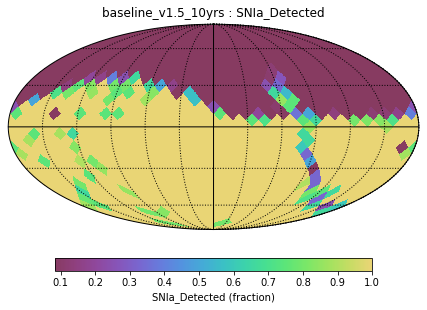

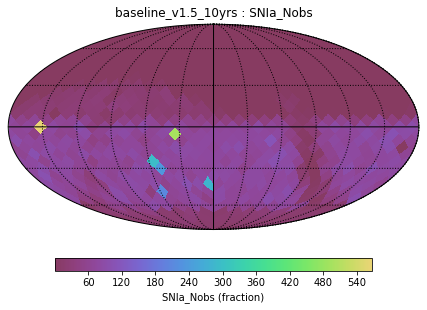

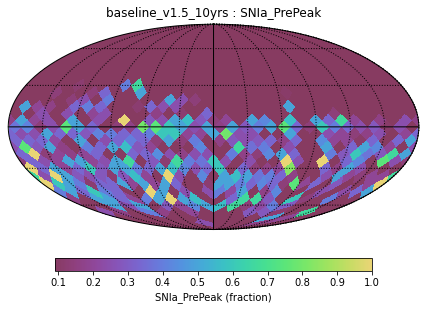

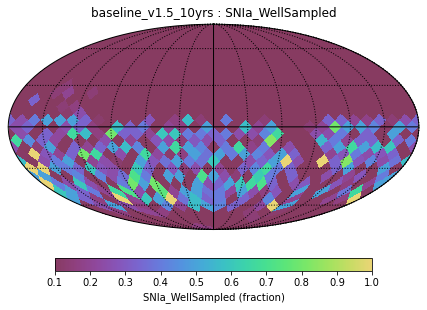

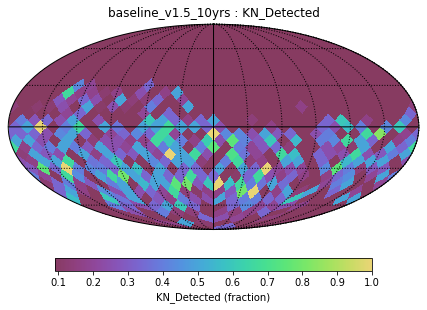

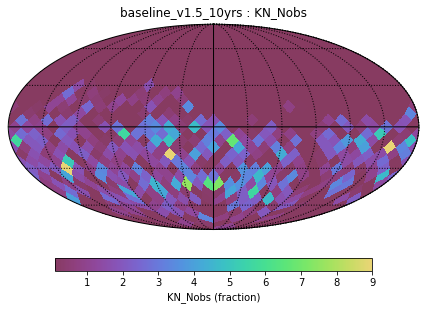

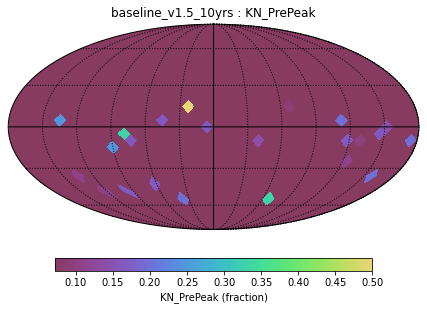

<Figure size 432x288 with 0 Axes>

In [7]:
bgroup.plotAll(closefigs=False)

In [8]:
for key in bundleDict:
    print(key, bundleDict[key].summaryValues)


baseline_v1_5_10yrs_SNIa_USER {}
baseline_v1_5_10yrs_KN_USER {}
SNIa_Detected {'Mean': 0.62025}
SNIa_Nobs {'Mean': 39.7075}
SNIa_PrePeak {'Mean': 0.16525}
SNIa_WellSampled {'Mean': 0.15375}
KN_Detected {'Mean': 0.17825}
KN_Nobs {'Mean': 0.883}
KN_PrePeak {'Mean': 0.006}
KN_WellSampled {'Mean': 0.0}


In [9]:
ack = _healbin(slicer1.slicePoints['ra'],slicer1.slicePoints['dec'],
               bundleDict['SNIa_WellSampled'].metricValues, nside=8,
               reduceFunc=np.mean)
              

/Users/yoachim/git_repos/sims_utils/python/lsst/sims/utils/healpyUtils.py:142: UserWarning: Warning: converting a masked element to nan.
  mapVals[idx] = reduceFunc(values[left[i]:right[i]])


/Users/yoachim/lsst/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.1/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/Users/yoachim/lsst/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.1/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/Users/yoachim/lsst/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.1/lib/python3.8/site-packages/healpy/projaxes.py:9

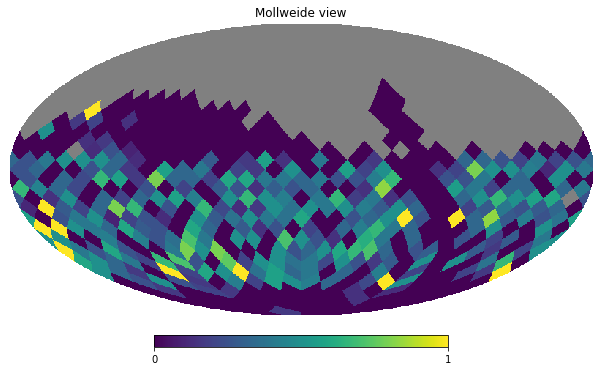

In [10]:
hp.mollview(ack)

<ipython-input-11-f54226b36afd>:1: RuntimeWarning: invalid value encountered in log10
  plt.plot(slicer2.slicePoints['plc'][0]['r']['mjd'], -2.5*np.log10(slicer2.slicePoints['plc'][0]['r']['fluxcal'])+27.5 )


Text(0, 0.5, 'r (mags)')

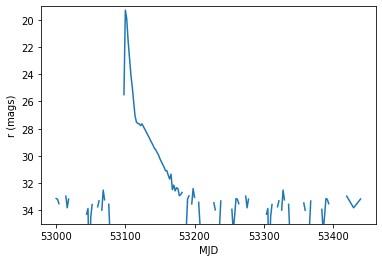

In [11]:
plt.plot(slicer2.slicePoints['plc'][0]['r']['mjd'], -2.5*np.log10(slicer2.slicePoints['plc'][0]['r']['fluxcal'])+27.5 )
plt.ylim([35,19])
plt.xlabel('MJD')
plt.ylabel('r (mags)')